In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv("Data/Mall_Customers.csv")
df.drop(columns=['CustomerID', 'Age', 'Genre'], axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [92]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


### Scaling and Visualization

In [93]:
def min_max_Scaling(X):
  return (X - X.min()) / (X.max() - X.min())

df['Annual Income (k$)'] = min_max_Scaling(df['Annual Income (k$)'])
df['Spending Score (1-100)'] = min_max_Scaling(df['Spending Score (1-100)'])
df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


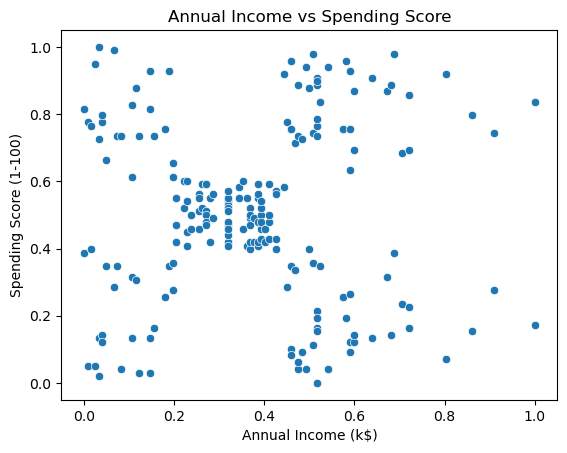

In [94]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### KMeans

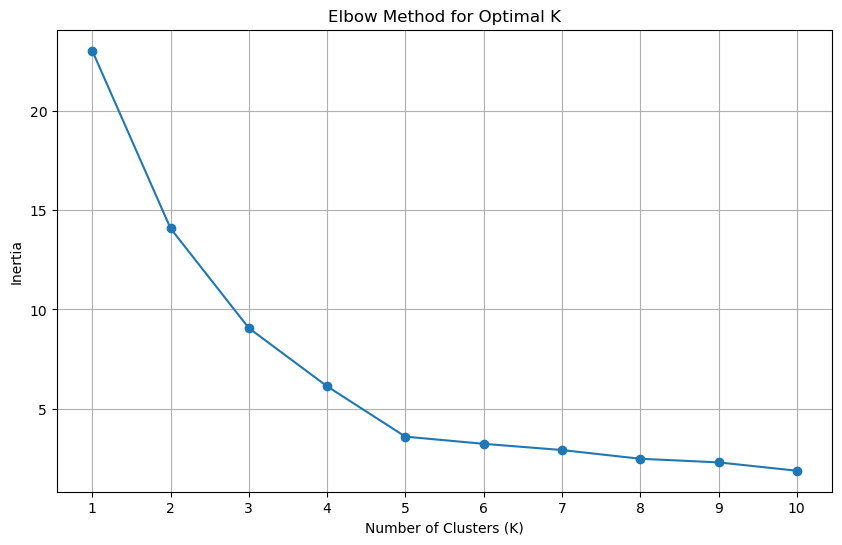

In [95]:
intertia = []
for i in range(1, 11):
    kmeans = KMeans(i, n_init="auto", random_state=42)
    kmeans.fit(df)
    intertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), intertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.grid()
plt.show()



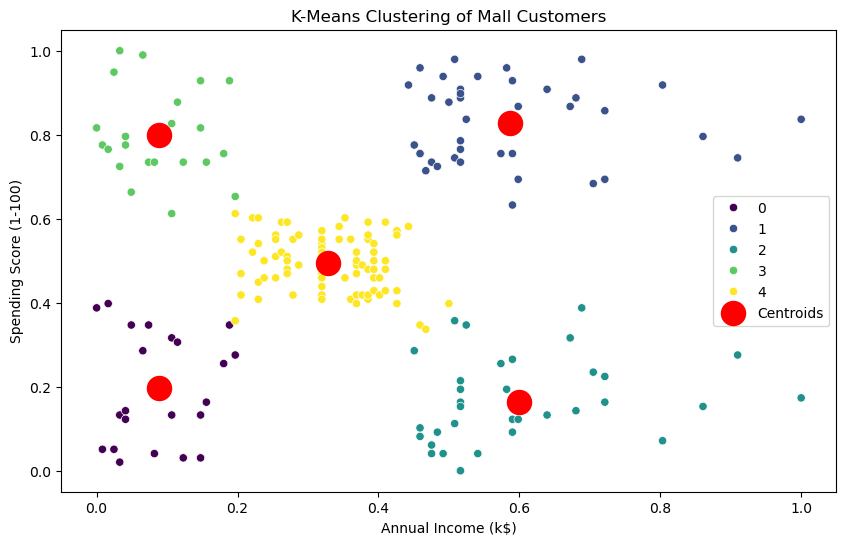

In [96]:
kmeans = KMeans(5, n_init="auto")
kmeans.fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
df = pd.DataFrame(df, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df['Cluster'] = labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [97]:
spending_score = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score by Cluster:")
print(spending_score)

Average Spending Score by Cluster:
Cluster
0    0.196197
1    0.827839
2    0.164431
3    0.799629
4    0.493405
Name: Spending Score (1-100), dtype: float64


### DBSCAN

In [98]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

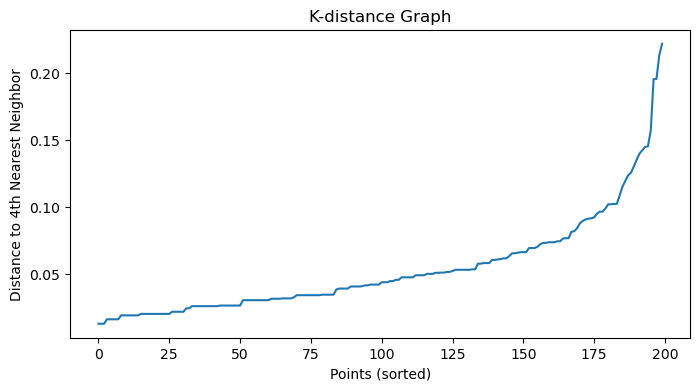

In [99]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points (sorted)")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.show()

In [100]:
dbscan = DBSCAN(eps=0.09, min_samples=4) 
dbscan.fit(X)
labels = dbscan.labels_
print(set(labels))

{0, 1, 2, 3, 4, -1}


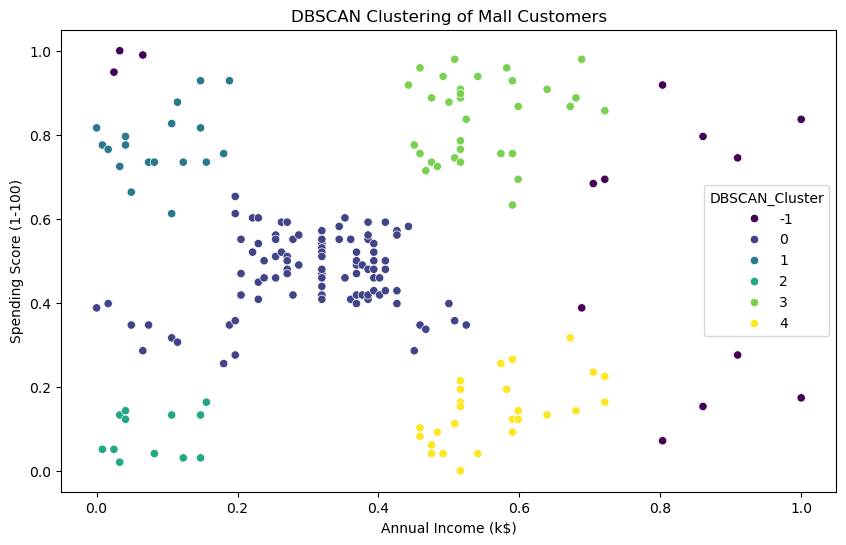

In [101]:
df['DBSCAN_Cluster'] = labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title("DBSCAN Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()